# Introduction to R Part 15: Preparing Numeric Data

Numeric data tends to be more well-behaved than text data. There's only so many symbols that appear in numbers and they have well-defined values. Despite its relative cleanliness, there are variety of preprocessing tasks you should consider before using numeric data. In this lesson we'll learn some common operations used to prepare numeric data for use in analysis and predictive models.

### Centering and Scaling Data

Numeric variables are often on different scales and cover different ranges, so they can't be easily compared. What's more, variables with large values can dominate those with smaller values when using certain modeling techniques. Centering and scaling is a common preprocessing task that puts numeric variables on a common scale so no single variable will dominate the others.

The simplest way to center data is to subtract the mean value from each data point. Subtacting the mean centers the data around zero and sets the new mean to zero. Let's try zero-centering the mtcars dataset:

In [1]:
cars <- mtcars

print(head(cars))

column_means <- colMeans(cars)         # Get the means of each column

print(column_means)                    # Check means

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1
       mpg        cyl       disp         hp       drat         wt       qsec 
 20.090625   6.187500 230.721875 146.687500   3.596563   3.217250  17.848750 
        vs         am       gear       carb 
  0.437500   0.406250   3.687500   2.812500 


With the column means in hand, we just need to subtract the column means from each row in an element-wise fasion. To do this we can create a matrix with the same number of rows as the cars data set, where each row contains the column means:

In [2]:
center_matrix <- matrix( rep(column_means, nrow(cars)),   # Repeat the column means
                          nrow=nrow(cars),
                          ncol=ncol(cars),
                          byrow = TRUE)                   # Construct row by row

centered <- cars - center_matrix        # Subtract column means

print( head( centered ))                # Check the new data set

print(colMeans(centered))               # Check the new colunm means to confirm they are 0

                        mpg     cyl        disp       hp       drat       wt
Mazda RX4          0.909375 -0.1875  -70.721875 -36.6875  0.3034375 -0.59725
Mazda RX4 Wag      0.909375 -0.1875  -70.721875 -36.6875  0.3034375 -0.34225
Datsun 710         2.709375 -2.1875 -122.721875 -53.6875  0.2534375 -0.89725
Hornet 4 Drive     1.309375 -0.1875   27.278125 -36.6875 -0.5165625 -0.00225
Hornet Sportabout -1.390625  1.8125  129.278125  28.3125 -0.4465625  0.22275
Valiant           -1.990625 -0.1875   -5.721875 -41.6875 -0.8365625  0.24275
                      qsec      vs       am    gear    carb
Mazda RX4         -1.38875 -0.4375  0.59375  0.3125  1.1875
Mazda RX4 Wag     -0.82875 -0.4375  0.59375  0.3125  1.1875
Datsun 710         0.76125  0.5625  0.59375  0.3125 -1.8125
Hornet 4 Drive     1.59125  0.5625 -0.40625 -0.6875 -1.8125
Hornet Sportabout -0.82875 -0.4375 -0.40625 -0.6875 -0.8125
Valiant            2.37125  0.5625 -0.40625 -0.6875 -1.8125
          mpg           cyl          disp

With zero-centered data, negative values are below average and posative values are above average.

Now that the data is centered, we'd like to put it all on a common scale. One way to put data on a common scale is to divide by the standard deviation. Standard deviation is a statistic that describes the spread of numeric data. The higher the standard deviation, the further the data points tend to be spread away from the mean value. You can get standard deviations with the sd() function:

In [3]:
sd(centered$mpg)                 #Get the standard deviation of the mpg column

[1] 6.026948

We need to get the standard deviation of each column. Unfortuenly, there's no simple built in function designed to give us the standard deviation of each column like the colMeans() function did when we needed the averages of each column. Instead, we can use the apply() function. apply() lets you apply a function you supply to each row or each column of a matrix or data frame:

In [4]:
column_sds <- apply(centered,       # a matrix or data frame
                    MARGIN = 2,     # operate on rows(1) or columns(2)
                    FUN = sd)       # function to apply

print(column_sds)                   # check standard deviations

        mpg         cyl        disp          hp        drat          wt 
  6.0269481   1.7859216 123.9386938  68.5628685   0.5346787   0.9784574 
       qsec          vs          am        gear        carb 
  1.7869432   0.5040161   0.4989909   0.7378041   1.6152000 


Now that we have the column standard deviations, we can use the same matrix construction method we used before to scale the data:

In [5]:
scale_matrix <- matrix( rep(column_sds, nrow(cars)),      # Repeat the column sds
                          nrow=nrow(cars),
                          ncol=ncol(cars),
                          byrow = TRUE)                 

centered_scaled <- centered/scale_matrix       # Divide by column sds to scale the data

summary(centered_scaled)                       # Confirm that variables are on similar scales

      mpg               cyl              disp               hp         
 Min.   :-1.6079   Min.   :-1.225   Min.   :-1.2879   Min.   :-1.3810  
 1st Qu.:-0.7741   1st Qu.:-1.225   1st Qu.:-0.8867   1st Qu.:-0.7320  
 Median :-0.1478   Median :-0.105   Median :-0.2777   Median :-0.3455  
 Mean   : 0.0000   Mean   : 0.000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4495   3rd Qu.: 1.015   3rd Qu.: 0.7688   3rd Qu.: 0.4859  
 Max.   : 2.2913   Max.   : 1.015   Max.   : 1.9468   Max.   : 2.7466  
      drat               wt               qsec                vs        
 Min.   :-1.5646   Min.   :-1.7418   Min.   :-1.87401   Min.   :-0.868  
 1st Qu.:-0.9661   1st Qu.:-0.6500   1st Qu.:-0.53513   1st Qu.:-0.868  
 Median : 0.1841   Median : 0.1101   Median :-0.07765   Median :-0.868  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000  
 3rd Qu.: 0.6049   3rd Qu.: 0.4014   3rd Qu.: 0.58830   3rd Qu.: 1.116  
 Max.   : 2.4939   Max.   : 2.2553   Max.   : 2.82675   Ma

Manually centering and scaling as we've done is a good exercise and it gave us an excuse to learn a couple new functions, but like many common tasks in R, built in functions and packages can often make your life easier. It turns out R has a built in function, scale(), that automatically centers and scales data:

In [6]:
auto_scaled <- scale(cars,              # numeric data object
                    center=TRUE,        # center the data?
                    scale=TRUE)         # scale the data?

summary(auto_scaled)        # check the auto scaled data

      mpg               cyl              disp               hp         
 Min.   :-1.6079   Min.   :-1.225   Min.   :-1.2879   Min.   :-1.3810  
 1st Qu.:-0.7741   1st Qu.:-1.225   1st Qu.:-0.8867   1st Qu.:-0.7320  
 Median :-0.1478   Median :-0.105   Median :-0.2777   Median :-0.3455  
 Mean   : 0.0000   Mean   : 0.000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4495   3rd Qu.: 1.015   3rd Qu.: 0.7688   3rd Qu.: 0.4859  
 Max.   : 2.2913   Max.   : 1.015   Max.   : 1.9468   Max.   : 2.7466  
      drat               wt               qsec                vs        
 Min.   :-1.5646   Min.   :-1.7418   Min.   :-1.87401   Min.   :-0.868  
 1st Qu.:-0.9661   1st Qu.:-0.6500   1st Qu.:-0.53513   1st Qu.:-0.868  
 Median : 0.1841   Median : 0.1101   Median :-0.07765   Median :-0.868  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000  
 3rd Qu.: 0.6049   3rd Qu.: 0.4014   3rd Qu.: 0.58830   3rd Qu.: 1.116  
 Max.   : 2.4939   Max.   : 2.2553   Max.   : 2.82675   Ma

Note that the summary output is identical for both the automatically scaled and the data we scaled manually.

### Dealing With Skewed Data

The distribution of data--its overall shape and how it is spread out--can have a significant impact on analysis and modeling. Data that is roughly evenly spread around the mean value--known as normally distributed data--tends to be well-behaved. On the other hand, some data sets exhibit significant skewness or asymmetry. To illustrate, lets generate a few distributions

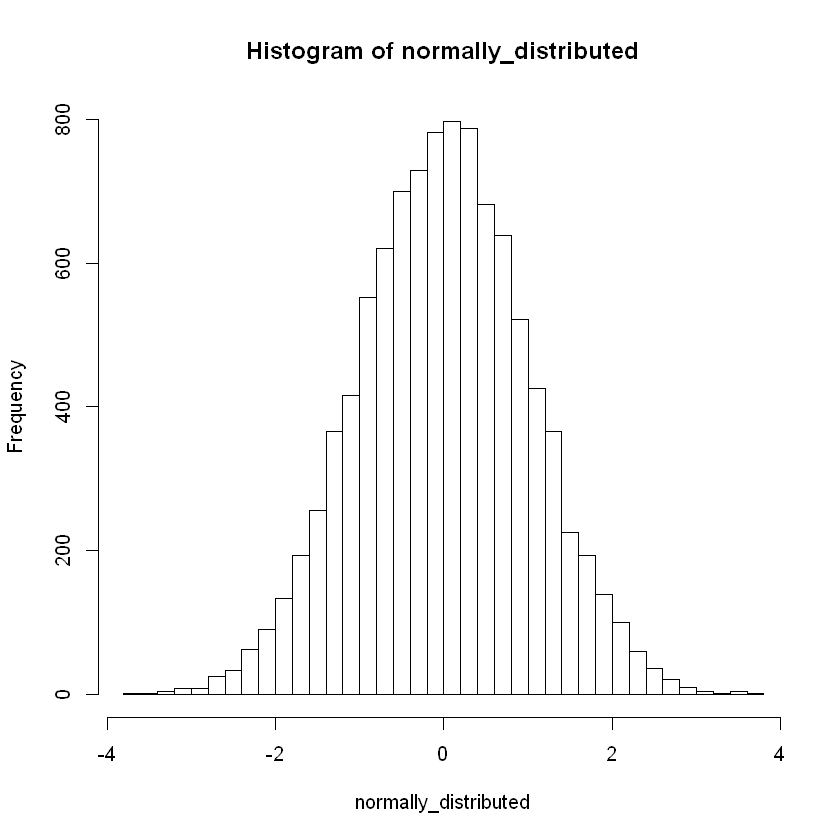

In [7]:
normally_distributed <- rnorm(10000)    # generate normally distributed data

hist(normally_distributed, breaks=30)   # create a histogram of the distribution

*Note: normally distributed data tends to look roughly symmetric with a bell-shaped curve.

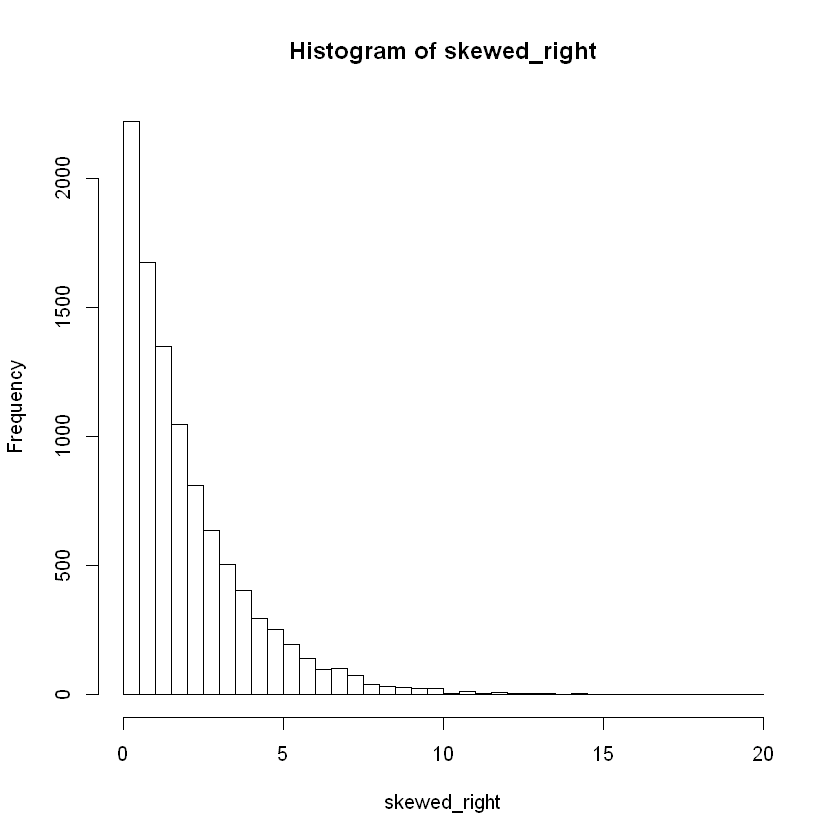

In [8]:
skewed_right <- rexp(10000, 0.5)       # generate skewed data

hist(skewed_right, breaks=50)          # create a histogram of the distribution

*Note: data with a long tail that goes off to the right is called positively skewed or right skewed.

When you have a skewed distribution like the one above, the extreme values in the long tail can have a disproportionetly large influence on whatever test you perform or models you build. Reducing skew may improve your results. Taking the square root of each data point or taking the natural logarithm of each data point are two simple transformations that can reduce skew. Lets see thier effects on the skewed data we generated earlier:

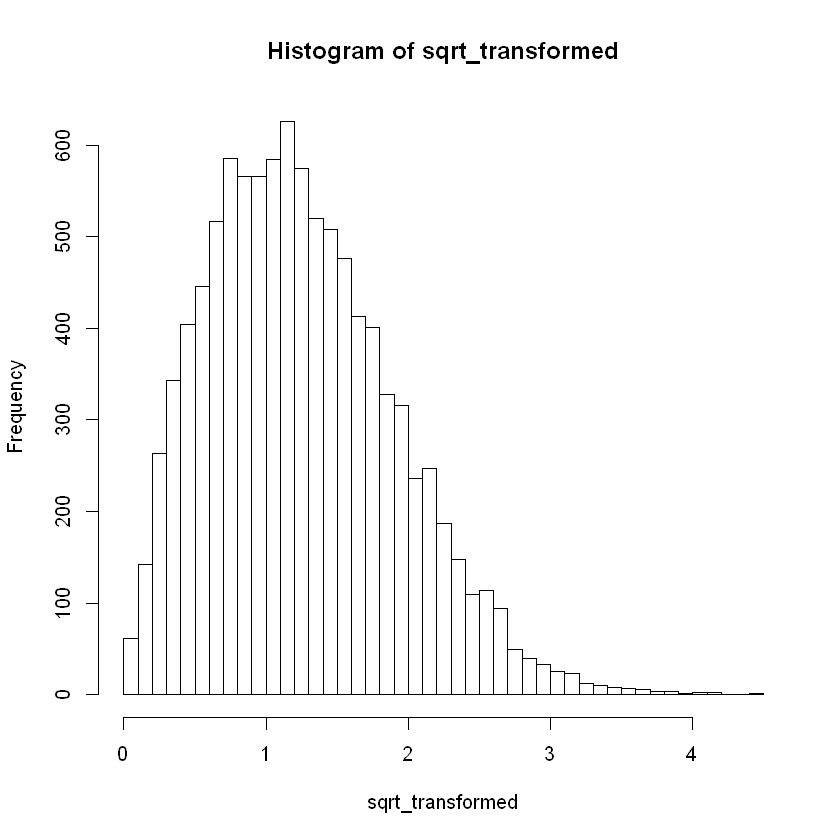

In [9]:
sqrt_transformed <- sqrt(skewed_right)

hist(sqrt_transformed, breaks=50) 

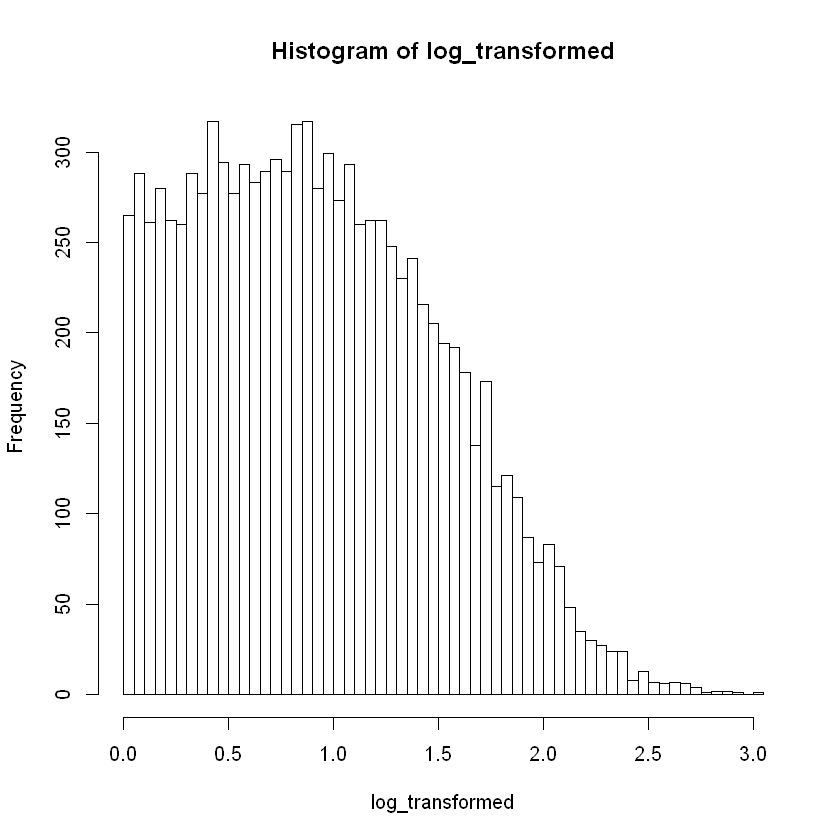

In [10]:
log_transformed <- log(skewed_right+1)

hist(log_transformed, breaks=50) 

*Note: adding 1 before taking the log ensures we don't end up with negative values. Also note that neither of these transformations work on data containing negtaive values. To make them work on data with negative values add a constant to each value that is large enough to make all the data greater than or equal to 1 (such as adding the absolute value of the smallest number +1)

Both the sqrt() and log() transforms reduced the skew of the data. It's still not quite normally distributed, but the amount of extreme data in the tails has been reduced to the point where we might not be so worried about it having a large influence on our results.

### Highly Correlated Variables

In predictive modeling, each variable you use to construct a model would ideally represent some unique feautre of the data. In other words, you want each varaible to tell you something different. In reality, variables otfen exhibit collinearity--a strong correlation or tendency to move together, typically due to some underlying similarity or common influencing factor. Variables with strong correlations can interfere with one another when performing modeling and muddy results. 

You can check the pairwise correlations bewteen numeric variables using the cor() function:

In [11]:
cor(cars[,1:6])             #Check the pairwise correlations of 6 variables

,mpg,cyl,disp,hp,drat,wt
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.6811719,-0.8676594
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.6999381,0.7824958
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.7102139,0.8879799
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.4487591,0.6587479
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.0000000,-0.7124406
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.7124406,1.0000000


A positive correlation implies that when one variable goes up the other tends to go up as well. Negative correlations indicate an inverse relationship: when one variable goes up the other tends to go down. A correlation near zero indicates low correlation while a correlation near -1 or 1 indicates a large negative or positive correlation. 

Inspecting the data table, we see that the number of cylindars a car has (cyl) and its weight (wt) have fiarly strong negative correlations to cas milage (mpg.). This indicates that heavier cars and cars with more cylindars tend to get lower gas mileage. 

A scatter plot matrix can be a helpful visual aide for inspecting colinearity. We can create one with the pairs() function:

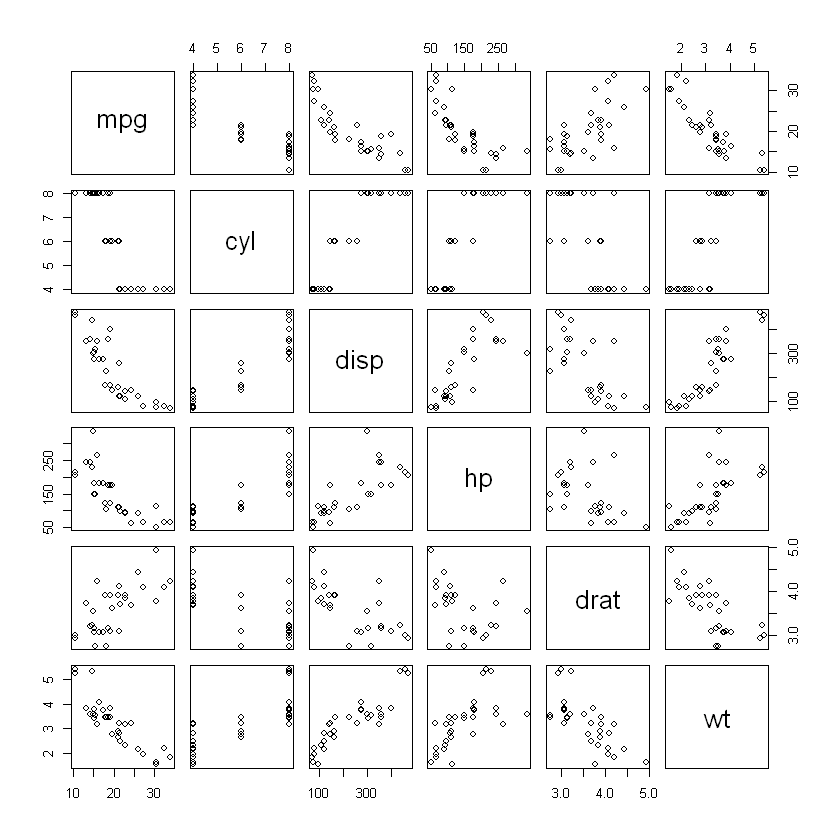

In [12]:
pairs(cars[,1:6])

A scatter plot matrix creates pairwise scatter plots that let you visually inspect the relationships beween pairs of variables. It can also help identify oddities in the data, such as variables like cyl that only take on values in a small discrete set.

If you find highly correlated variables, there are a few things you can do including:

1. Leave them be
2. Remove one
3. Combine them in some way*

Reducing the number of variables under consideration, either by removing some or by combining them some way is known as "dimensionality reduction." How you choose to handle correlated varaibles is ultimately a subjective decision that should be informed by your goal.

*Note: we'll discuss methods to combine variables in a future lesson.

### Imputing Missing Data

In the lesson on initial data exploration, we explored Titanic survivor data and found that several passengers had missing or NA values listed for age. Missing values in numeric data are troublesome because you can't simply treat them as a category: you have to either remove them or fill them in. 

Imputaion describes filling in missing data with estimates based on the rest of the data set. When working with the titanic data set, we simply set all the missing Age values to the median age for the data set. This is an example of a simplistic imputation. In practice, we might get better results using a different imputation method that doesn't fill in all the missing numbers with the same value.

A common way to impute missing data is to choose values based on similar or "neighboring" records. For instance, if two passengers on the Titanic were almost identical but age was missing for one of them, we could fill in the missing age with the age of the neighbor. K-nearest neighbors or KNN imputation is a method for filling missing values that operates on this principle: it takes a record with a missing value, calculates that record's closest neighbors based on other variables in the data set and then sets the missing value to a weighted average of its closest neighbors (closer neighbors receive more weight.).

To perform KNN imputation we need to install a coupe of new packages: the "caret" pacakge and the "RANN" package:

In [13]:
# Install the caret package in R Studio and then load it. 
# Caret has some dependencies that you will have to install as well.

# install.pacakges("caret")
# install.packages("RANN")

library(caret)
library(RANN)

Loading required package: lattice
Loading required package: ggplot2


The caret package offers a wide range of functions for predictive modeling including preProcess(), an extremely useful function for data preparation. preProcess() accepts a matrix or data frame as input and then performs one or more data preprocessing tasks automatically. The preProcess() function can perform scaling, centering, skewness reduction, imputation and even dimensionality reduction all at the same time. The RANN package implements a fast nearest neighbors search that the caret package uses to perform KNN imputation.

Let's start by removing some random mpg values from the mtcars data set and then use preProcess() to impute them back with KNN imputation:

In [14]:
#The following line sets random mpg values to NA
cars$mpg <- ifelse(runif(nrow(mtcars),0,10) > 7, NA, cars$mpg ) 

summary(cars$mpg)                   # check mpg to confirm NA's have been added

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   10.4    16.1    19.7    20.6    22.8    33.9       9 

In [15]:
impute <- preProcess(cars,                   # Run preprocessing on cars
                     method=c("knnImpute"))  # Use knn imputation

cars <- predict(impute, cars)                # use preprocessing info to predict new values

summary(cars)                                # Check cars

      mpg                cyl              disp               hp         
 Min.   :-1.73853   Min.   :-1.225   Min.   :-1.2879   Min.   :-1.3810  
 1st Qu.:-0.75933   1st Qu.:-1.225   1st Qu.:-0.8867   1st Qu.:-0.7320  
 Median :-0.24885   Median :-0.105   Median :-0.2777   Median :-0.3455  
 Mean   :-0.08096   Mean   : 0.000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.20879   3rd Qu.: 1.015   3rd Qu.: 0.7688   3rd Qu.: 0.4859  
 Max.   : 2.26691   Max.   : 1.015   Max.   : 1.9468   Max.   : 2.7466  
      drat               wt               qsec                vs        
 Min.   :-1.5646   Min.   :-1.7418   Min.   :-1.87401   Min.   :-0.868  
 1st Qu.:-0.9661   1st Qu.:-0.6500   1st Qu.:-0.53513   1st Qu.:-0.868  
 Median : 0.1841   Median : 0.1101   Median :-0.07765   Median :-0.868  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000  
 3rd Qu.: 0.6049   3rd Qu.: 0.4014   3rd Qu.: 0.58830   3rd Qu.: 1.116  
 Max.   : 2.4939   Max.   : 2.2553   Max.   : 2.826

As we can see from the summary output, the NA values in the mpg variable are gone, but the scale of the variables looks a bit strage. It turns out that preProcess() automatically centers and scales your data when performing KNN imputation because data that is on different scales does not work well when calculating the distance of neighbors. 

### Wrap Up

In the past two lessons we've learned a varitey of methods for preparing text data and numeric data. The majority of data you encounter will likely fall in one of these two categories, but there is one other type of data that appears with enough frequency that you will have to deal with it sooner or later: dates.

### Next Time: Introduction to R Part 16: Dealing with Dates